## 1. 熵：

* **信息量：一条信息的信息量大小和它的不确定性有很大的关系。**
$$
\text{I}(x) = - \log(\text{P}(x))
$$


* **熵：表示随机变量不确定的度量，是对所有可能发生的事件产生的信息量的期望。**

$$
H(x) = - \sum_{i=1}^N \text{P}(x_i) \log(\text{P}(x_i))
$$

* **相对熵：又称KL散度，用于衡量对于同一个随机变量x的两个分布p(x)和q(x)之间的差异。**

$$
D_{kl}(p||q) = \sum_{i=1}^N \text{P}(x_i) \log (\frac{\text{P}(x_i)}{\text{q}(x_i)})
$$

* **交叉熵：将KL散度的公式进行变形得到交叉熵。**

$$
\text{H}(p, q) = - \sum_{i=1}^N \text{p}(x_i) \log(\text{q}(x_i))
$$

**为什么交叉熵用于分类问题 - 误差越大下降越快。MSE用于分类问题的话并非如此，具体参考下方链接。**

https://zhuanlan.zhihu.com/p/61944055

## 2. 逻辑回归的损失函数：

### 2.1 logistic loss: 

**logistic loss是交叉熵在二分类问题下的特例。**

<img src="image_github/logistic_regression.png" width="600" height="500">

* **雅可比矩阵形式：一个多元函数的一阶偏导数构成的矩阵。**

<img src="image_github/LR_1.png" width="600" height="500">

* **海森矩阵形式：一个多元函数的二阶偏导数构成的方阵。**

<img src="image_github/LR_2.png" width="600" height="500">

### 2.2 交叉熵 cross-entropy: 

* **雅可比矩阵形式：一个多元函数的一阶偏导数构成的矩阵。**

$$
\text{g}(\text{W}) = \text{X}^\text{T} (\sigma - \text{y}), \sigma = [\sigma(\text{W}^\text{T} \text{x}_1), \dots, \sigma(\text{W}^\text{T} \text{x}_n)]^\text{T}
$$


* **海森矩阵形式：一个多元函数的二阶偏导数构成的方阵。**

$$
\text{H}(W) = \frac{\mathrm{d} \text{g}(W)^\text{T}}{\mathrm{d}W} = \text{X}^\text{T} \Sigma \text{X}
$$

$$
\Sigma = \text{diag}([\sigma(\text{W}^\text{T}\text{x}_1)[1 - \sigma(\text{W}^\text{T}\text{x}_1)], \dots, \sigma(\text{W}^\text{T}\text{x}_n)[1 - \sigma(\text{W}^\text{T}\text{x}_n)]])
$$

## 3. 线搜索 line search：

最优化问题中，线搜索是一种寻找目标函数的局部最小值的近似方法。它是最基础的迭代近似方法之一，另一种是置信域方法。线搜索近似首先找到一个使目标函数下降的方向，然后计算应该沿着这个方向移动的步长。下降方向可以通过多种方法计算，比如梯度下降法，牛顿法和拟牛顿法。

<img src="image_github/search_direction.png" width="400" height="400">

### 3.1 牛顿法：

牛顿法的基本思想是利用迭代点处的一阶导数(梯度)和二阶导数(Hessen矩阵)对目标函数进行二次函数近似，然后把二次模型的极小点作为新的迭代点，并不断重复这一过程，直至求得满足精度的近似极小值。牛顿法的速度相当快，而且能高度逼近最优值。牛顿法分为基本的牛顿法和全局牛顿法。

* **泰勒公式：如果函数平滑且某点存在各阶导数，则可以用一个多项式来描述该点邻域的近似值。**
>$$
f(x) = \sum_{i=0}^\infty f^{(n)}(x_0) \frac{1}{n!} (x-x_0)^n
$$
<img src="image_github/tayler.png" width="400" height="400">

* **牛顿法：海森矩阵必须是正定矩阵。**
>对函数在某一点二次泰勒展开求导等于0。公式如下所示：
$$
f(x) \approx g(x) = f(x_k) + f(x_k)^\prime (x-x_k) + f(x_k)^{\prime \prime} (x-x_k)^2
$$
$$
f(x_k)^\prime + f(x_k)^{\prime \prime} (x-x_k) = 0
$$
$$
x = x_k - \frac{f^\prime (x_k)}{f^{\prime \prime} (x_k)}
$$
<img src="image_github/newton3.png" width="300" height="200">
对于多元函数，函数极值可以通过判断海森矩阵是否为正定。
<img src="image_github/newton1.png" width="600" height="500">
<img src="image_github/newton2.png" width="600" height="500">

**如何处理海森矩阵非正定情况？**

<img src="image_github/newton4.png" width="500" height="500">

LM: https://blog.csdn.net/mingtian715/article/details/53579379

**由于海森矩阵计算困难，无法应用于机器学习中，通过BFGS算法逼近海森矩阵。**

### 3.2 拟牛顿法 - BFGS：

<img src="image_github/BFGS.png" width="500" height="500">


<img src="image_github/BFGS1.png" width="500" height="500">
$C_0$为单位矩阵。

**虽然我们使用了BFGS算法来利用单位矩阵逐步逼近H矩阵,但是每次计算的时候都要存储C矩阵,C矩阵有多大呢.假设我们的数据集有十万个维度(不算特别大),那么每次迭代所要存储D矩阵的结果是74.5GB.我们无法保存如此巨大的矩阵内容,如何解决呢?**

### 3.3 L-BFGS:

<img src="image_github/BFGS2.png" width="700" height="500">

原文链接：https://blog.csdn.net/weixin_39445556/java/article/details/84502260

## 4. Regularisation：

<img src="image_github/reg.png" width="500" height="500">

## 5. learning rate:

<img src="image_github/lr.png" width="500" height="500">

## 6. pySpark:

In [1]:
import os
import subprocess
def module(*args):        
    if isinstance(args[0], list):        
        args = args[0]        
    else:        
        args = list(args)        
    (output, error) = subprocess.Popen(['/usr/bin/modulecmd', 'python'] + args, stdout=subprocess.PIPE).communicate()
    exec(output)    
module('load', 'apps/java/jdk1.8.0_102/binary')    
os.environ['PYSPARK_PYTHON'] = os.environ['HOME'] + '/.conda/envs/jupyter-spark/bin/python'

In [2]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[2]") \
    .appName("COM6012 DT") \
    .getOrCreate()

In [7]:
import numpy as np
rawdata = spark.read.csv('../Data/spambase.data')
rawdata.cache()
ncolumns = len(rawdata.columns)
spam_names = [spam_names.rstrip('\n') for spam_names in open('../Data/spambase.data.names')]
number_names = np.shape(spam_names)[0]
for i in range(number_names):
    local = spam_names[i]
    colon_pos = local.find(':')
    spam_names[i] = local[:colon_pos]

In [8]:
schemaNames = rawdata.schema.names
spam_names[ncolumns-1] = 'labels'
for i in range(ncolumns):
    rawdata = rawdata.withColumnRenamed(schemaNames[i], spam_names[i])

In [9]:
from pyspark.sql.types import DoubleType
for i in range(ncolumns):
    rawdata = rawdata.withColumn(spam_names[i], rawdata[spam_names[i]].cast(DoubleType()))

In [10]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = spam_names[0:ncolumns-1], outputCol = 'features') 
raw_plus_vector = assembler.transform(rawdata)
data = raw_plus_vector.select('features','labels')

In [11]:
(trainingData, testData) = data.randomSplit([0.7, 0.3], 42)

In [12]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol='features', labelCol='labels', maxIter=50, regParam=0, family="binomial")
lrModel1 = lr.fit(trainingData)
predictions = lrModel1.transform(testData)

In [13]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="labels", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g " % accuracy)

Accuracy = 0.928945 


In [14]:
w_no_reg = lrModel1.coefficients.values

In [15]:
lrL1 = LogisticRegression(featuresCol='features', labelCol='labels', maxIter=50, regParam=0.01, elasticNetParam=1, family="binomial")
lrModelL1 = lrL1.fit(trainingData)
predictions = lrModelL1.transform(testData)
# With Predictions
evaluator = MulticlassClassificationEvaluator\
      (labelCol="labels", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g " % accuracy)

Accuracy = 0.907255 


In [16]:
w_L1 = lrModelL1.coefficients.values

Text(0.5, 1.0, 'L1 regularisation')

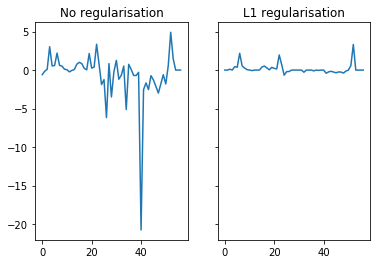

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(w_no_reg)
ax1.set_title('No regularisation')
ax2.plot(w_L1)
ax2.set_title('L1 regularisation')

In [18]:
spam_names[np.argmax(np.abs(w_no_reg))]

'word_freq_cs'

In [19]:
spam_names[np.argmax(np.abs(w_L1))]

'char_freq_$'